In [4]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on 2017/6/27 22:08

数据：excel表格，火焰图像对应的传感器测量的过程变量

@author: liangyu
"""

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_path = './Data/Data2_Full.xls'
init_data = pd.read_excel(data_path, header=0, index_col=0)

共有** 18355 **个过程变量样本，只有** 17724  **个火焰图像

In [6]:
init_data.head()

,Hour,Minute,Second,O2(%),CO(ppm),NO(ppm),SO2(ppm),Nox(ppm),CO2(%),CO2i(%),A/F ratio,Air of combustion,Fuel
NO,,,,,,,,,,,,,
1,14,0,1,7.17,4,185,24,185,7.84,10.37,1.392857,390.0,28
2,14,0,2,7.17,4,185,24,185,7.84,10.37,1.393214,390.1,28
3,14,0,3,7.18,3,185,24,185,7.83,10.37,1.392857,390.0,28
4,14,0,4,7.18,3,185,25,185,7.83,10.37,1.393214,390.1,28
5,14,0,5,7.18,3,185,25,185,7.83,10.51,1.392500,389.9,28


## 表格中各项数据含义：

1. NO，每个样本NO，共有18355个样本
2. Hour, Minute, Second 时间
3. ** O2(%) ** 排放废气中氧气含量
4. CO NO SO2 NOX CO2 CO2i 是废气中其他气体含量
5. A/F ratio 空气/燃料，Air of combustion 空气，Fuel 燃料

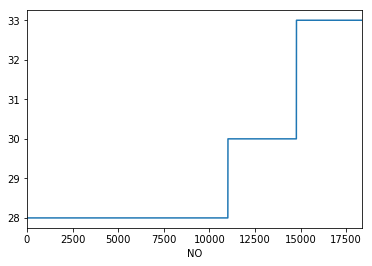

In [7]:
init_data['Fuel'].plot()

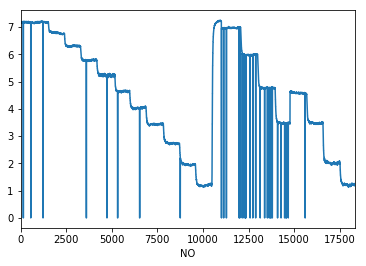

In [8]:
 init_data['O2(%)'].plot()

## 保留要研究的数据

图像是间隔一秒一张截取拍摄的，在过程变量中由对应的时间

由以上两幅图和数据得出：

1. 在样本** 11015 **处 Fuel 由28变为30，添加燃料
2. 在样本** 10493 **处 O2(%) 突然增加，不知道是什么原因
3. 由于传感器原因，O2(%) 有少部分0值，直接删去

过程变量：保留前10492组数据，时间是：16:56:39
火焰图像：保留对应过程变量时间的数据，但只有9854张图片

过程变量有10492组，图片有9854张。

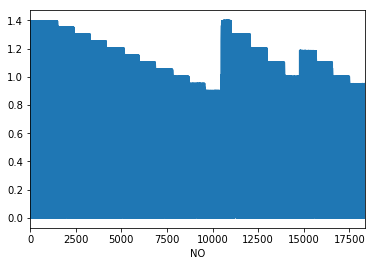

In [9]:
init_data['A/F ratio'].plot()

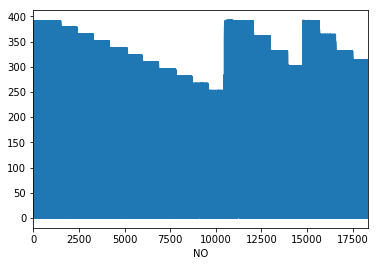

In [10]:
init_data['Air of combustion'].plot()

这两幅图没什么用

In [12]:
use_data = init_data[0:10492]

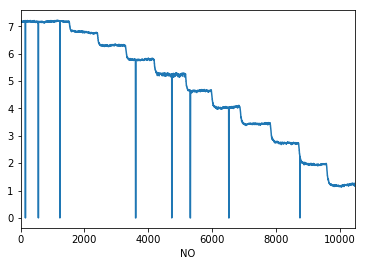

In [16]:
use_data['O2(%)'].plot()

## 将回归转化为分类

O2(%)呈现阶梯状分布，可以大致将燃烧状态分为11个状态，对应11类，首先将0值去除

## 去除0值

In [20]:
data_0 = use_data[use_data['O2(%)'] == 0]
data_0.shape[0]
data_0.head(35)

,Hour,Minute,Second,O2(%),CO(ppm),NO(ppm),SO2(ppm),Nox(ppm),CO2(%),CO2i(%),A/F ratio,Air of combustion,Fuel
NO,,,,,,,,,,,,,
153,14,2,33,0.0,0,0,0,0,0.0,0.0,1.392857,390.0,28
559,14,9,27,0.0,0,0,0,0,0.0,0.0,1.393571,390.2,28
1233,14,20,50,0.0,0,0,0,0,0.0,0.0,1.393571,390.2,28
3601,15,0,49,0.0,0,0,0,0,0.0,0.0,1.252500,350.7,28
3602,15,0,50,0.0,0,0,0,0,0.0,0.0,1.252500,350.7,28
3603,15,0,51,0.0,0,0,0,0,0.0,0.0,1.252143,350.6,28
3604,15,0,52,0.0,0,0,0,0,0.0,0.0,1.252143,350.6,28
3605,15,0,53,0.0,0,0,0,0,0.0,0.0,1.252857,350.8,28
3606,15,0,54,0.0,0,0,0,0,0.0,0.0,0.000000,0.0,28


删除过程变量的0值并删除对应时间的图片

* 过程变量：10457组
* 火焰图像：9830组

In [23]:
use_data_remove = use_data[use_data['O2(%)'] > 0]
use_data_remove.shape[0]

10457

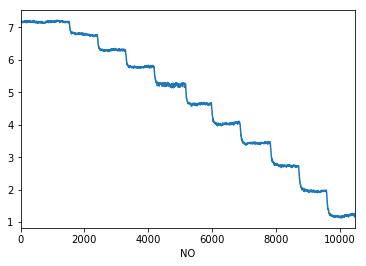

In [24]:
use_data_remove['O2(%)'].plot()

## 过程变量与火焰图像匹配